In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

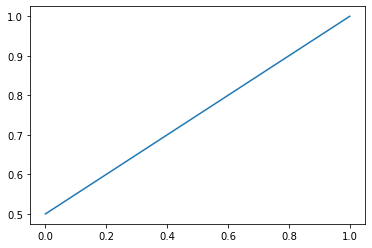

In [4]:
ES_i = 0.5
ES_j = 1
pc_j = np.linspace(0,1,100)
dES_j_social = pc_j * (1 - (1-ES_i) * (1-ES_j) ) + (1-pc_j) * ES_i * ES_j

plt.plot(pc_j,dES_j_social)